In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
def load_chipotle_data():
  return pd.read_csv('chipotle_stores.csv')

stores = load_chipotle_data()
stores.head()

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [5]:
stores['state'].value_counts()

California        421
Texas             226
Ohio              193
Florida           177
New York          160
Illinois          144
Virginia          107
Pennsylvania       96
Maryland           94
Arizona            85
Colorado           79
Minnesota          71
New Jersey         69
North Carolina     65
Massachusetts      62
Georgia            61
Washington         43
Indiana            40
Michigan           39
Missouri           39
Oregon             32
Kansas             30
Nevada             29
Tennessee          26
Connecticut        24
Kentucky           21
South Carolina     21
Washington DC      21
Wisconsin          20
Alabama            15
Oklahoma           12
Utah               11
Nebraska           10
Louisiana          10
Iowa               10
New Mexico          9
Rhode Island        9
Delaware            9
New Hampshire       8
West Virginia       6
Arkansas            6
Maine               5
Idaho               4
Montana             3
Mississippi         2
Vermont   

In [6]:
stipped_stores = stores[['address', 'latitude', 'longitude']].copy()
stipped_stores

,address,latitude,longitude
0,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...
2624,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416


In [7]:
stipped_stores = stipped_stores.drop_duplicates(keep='first')
stipped_stores

,address,latitude,longitude
0,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...
2624,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416


In [8]:
stipped_stores.shape

(2629, 3)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

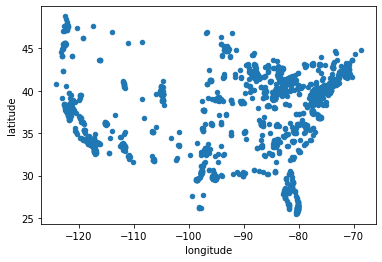

In [9]:
stipped_stores.plot(kind='scatter', x='longitude', y='latitude')

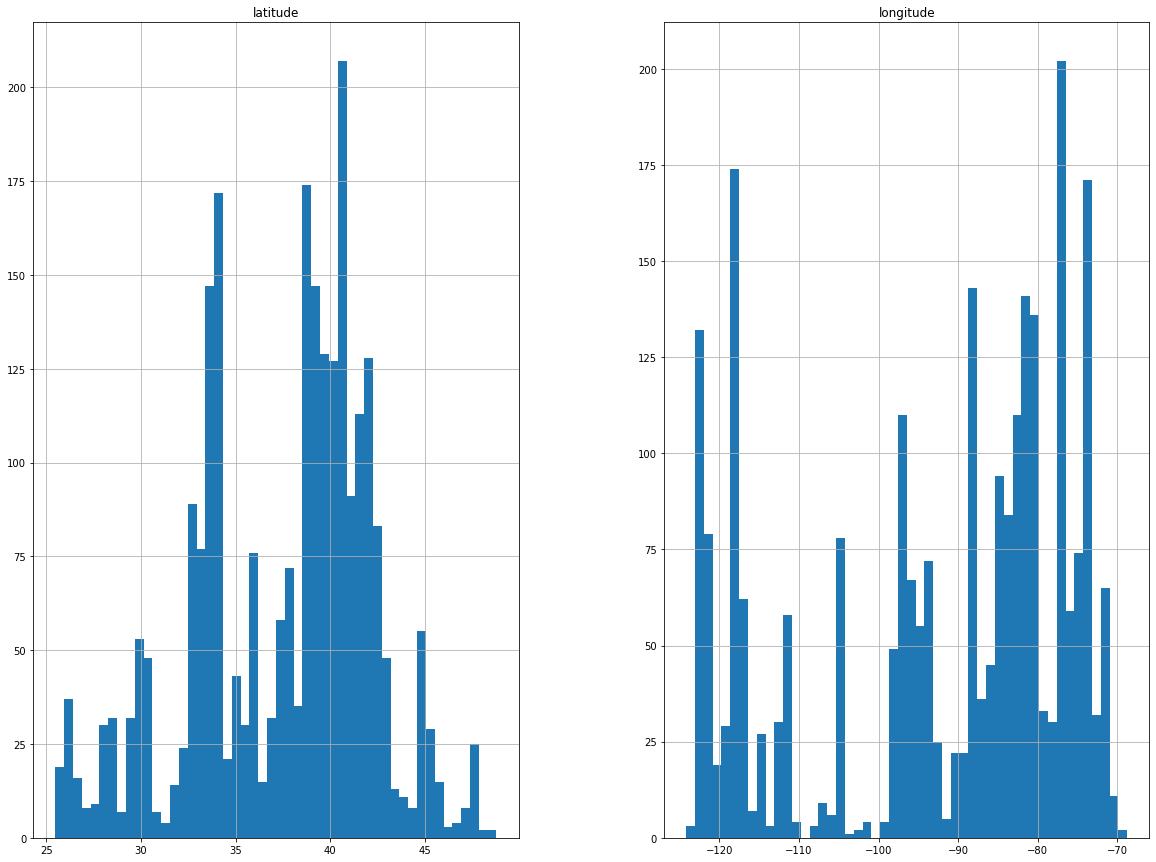

In [10]:
stipped_stores.hist(figsize=(20, 15), bins=50)
plt.show()

In [11]:
train_set, test_set = train_test_split(stipped_stores, test_size=0.2, random_state=42)

In [15]:
test_set.head()


,address,latitude,longitude
221,"501 N State College Blvd Ste A Fullerton, CA 9...",33.874571,-117.890173
318,"1715 Trancas St Suite D Napa, CA 94558 US",38.321300,-122.305961
926,"5961 N Lincoln Ave Suite 101 Chicago, IL 60659 US",41.989552,-87.705566
2489,"13300 Rittenhouse Dr Midlothian, VA 23112 US",37.415544,-77.641184
1420,"2391 N Highway 67 Florissant, MO 63033 US",38.804604,-90.308598


In [16]:
test_set.shape

(526, 3)

In [13]:
train_set.head()

,address,latitude,longitude
1208,"3333 Olney Sandy Springs Rd Olney, MD 20832 US",39.153198,-77.066176
2356,"10645 Broadway St Ste 118 Pearland, TX 77584 US",29.556469,-95.386450
482,3640-A Lake Tahoe Blvd Suite 100 South Lake Ta...,38.947987,-119.958031
1199,"9301 Woodmore Center Dr Ste 514 Lanham, MD 207...",38.921372,-76.846350
438,"1566 Monterey Hwy Ste 10 San Jose, CA 95110 US",37.314442,-121.871406


In [17]:
train_set.shape

(2103, 3)